In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
Files = glob.glob('./txt_files/*')
Files = sorted(Files)
print('Filesに含まれているtxtファイスは下記．\n' + '\n'.join(Files))

Filesに含まれているtxtファイスは下記．
./txt_files/data_01.txt
./txt_files/data_02.txt
./txt_files/data_03.txt
./txt_files/data_04.txt
./txt_files/data_05.txt
./txt_files/data_06.txt
./txt_files/data_07.txt
./txt_files/data_08.txt
./txt_files/data_09.txt
./txt_files/data_10.txt


#### data_01には，サンプル名「ABC-50」についての測定結果が記されている．

In [3]:
# 例えば./txt_files/data_01.txtにはこのような内容が含まれている．
'''
FILE NAME,data_01.txt
DATE,YYYYMMDD
SAMPLE NAME,ABC-50
TEST_DATA
N,Length(cm),Time(s),Weight(g)
1.0,41.1,27.0,5.201
2.0,43.7,26.9,5.151
3.0,50.4,27.6,5.677
4.0,24.8,27.0,4.907
5.0,31.3,25.9,5.142
''';

In [4]:
# dataframeにして書き出してみる
df_abc50 = pd.read_csv(Files[0], header=4)
print('ABC-50 の測定結果:')
df_abc50

ABC-50 の測定結果:


,N,Length(cm),Time(s),Weight(g)
0,1.0,41.1,27.0,5.201
1,2.0,43.7,26.9,5.151
2,3.0,50.4,27.6,5.677
3,4.0,24.8,27.0,4.907
4,5.0,31.3,25.9,5.142


#### 上の表ではサンプル名「ABC-50」について5回測定した際の，Length, Time, Weightの結果が記されている．<br>このうちTime (s)についてデータをまとめたいとする．<br>その他のtxtデータも同様の形式に従って，測定データが記述されている．

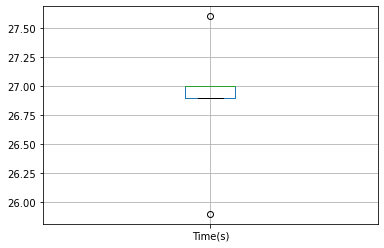

In [5]:
# boxplotにすると
df_abc50.boxplot(column=['Time(s)']);

#### 一つひとつのファイルを読み込んで，グラフにするのは，大変かつデータを俯瞰できないので，<br>今から，全てのテキストファイルを読み込んで，Timeに関するデータを集計する．

In [6]:
%precision 3
DF = []
for file in Files:
    with open(file) as f:
        L = [f.readline().split(',') for _ in range(4)]
        for l in L:
            if l[0] == 'SAMPLE NAME':
                sample = l[1].rstrip()
        df_i = pd.read_csv(f)
        s_i = df_i[['Time(s)']]
        s_i.columns= [sample]
        DF.append(s_i)
df = pd.concat(DF, axis=1)
tbl = df.copy()
s = tbl.median().rename('median')
tbl = pd.concat([tbl.T, s], axis=1).T.round(1).astype(str)

line = '='*70
print(line,'\n','DataFrame')
display(df)
print('\n\n',line,'\n','TABLE')
display(tbl)

 DataFrame


,ABC-50,ABC-51,ABC-52,ABC-53,ABC-54,ABC-55,ABC-56,ABC-57,ABC-58,ABC-59
0,27.0,22.9,34.5,31.5,42.1,34.9,28.8,32.1,33.4,25.7
1,26.9,24.2,38.2,27.1,22.1,34.4,26.9,31.8,28.4,33.0
2,27.6,29.0,22.3,30.2,37.2,35.8,28.0,31.8,29.5,35.1
3,27.0,29.2,32.2,32.3,44.6,32.7,29.5,32.0,32.1,30.5
4,25.9,25.9,18.3,30.4,38.5,33.3,26.1,32.0,30.3,38.3
5,NaN,24.5,NaN,33.6,19.0,27.0,28.7,32.0,NaN,30.7
6,NaN,NaN,NaN,26.1,32.5,34.9,NaN,32.1,NaN,38.4
7,NaN,NaN,NaN,31.3,43.4,35.3,NaN,32.0,NaN,30.5




 TABLE


,ABC-50,ABC-51,ABC-52,ABC-53,ABC-54,ABC-55,ABC-56,ABC-57,ABC-58,ABC-59
0,27.0,22.9,34.5,31.5,42.1,34.9,28.8,32.1,33.4,25.7
1,26.9,24.2,38.2,27.1,22.1,34.4,26.9,31.8,28.4,33.0
2,27.6,29.0,22.3,30.2,37.2,35.8,28.0,31.8,29.5,35.1
3,27.0,29.2,32.2,32.3,44.6,32.7,29.5,32.0,32.1,30.5
4,25.9,25.9,18.3,30.4,38.5,33.3,26.1,32.0,30.3,38.3
5,nan,24.5,nan,33.6,19.0,27.0,28.7,32.0,nan,30.7
6,nan,nan,nan,26.1,32.5,34.9,nan,32.1,nan,38.4
7,nan,nan,nan,31.3,43.4,35.3,nan,32.0,nan,30.5
median,27.0,25.2,32.2,30.8,37.8,34.6,28.4,32.0,30.3,31.8


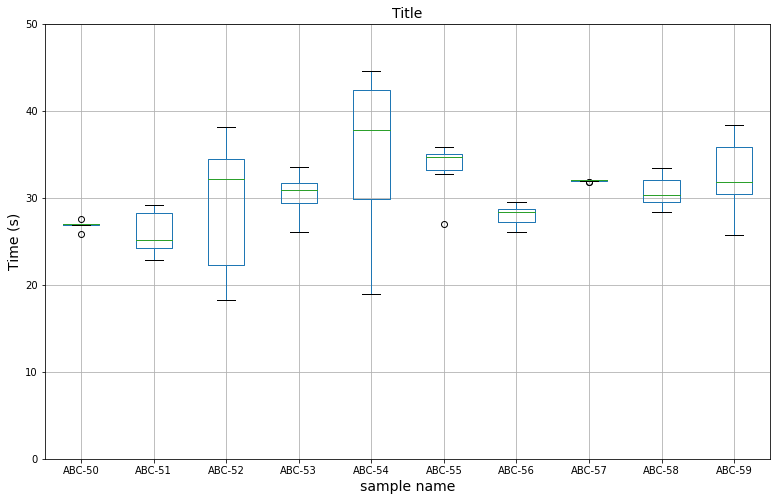

In [7]:
# make simple boxplot by using pandas
fig, ax = plt.subplots(figsize=(13, 8))
df.boxplot(ax=ax)
ax.set_ylim(0, 50)
ax.set_title('Title', size=14)
ax.set_xlabel('sample name', size=14)
ax.set_ylabel('Time (s)', size=14)
plt.show();

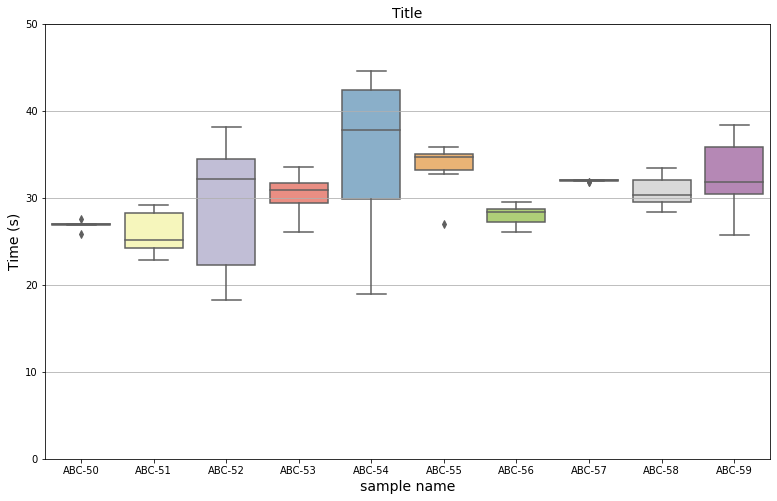

In [8]:
# use seaborn
fig, ax = plt.subplots(figsize=(13, 8))
sns.boxplot(data=df, ax=ax, palette='Set3')
ax.set_ylim(0, 50)
ax.set_title('Title', size=14)
ax.set_xlabel('sample name', size=14)
ax.set_ylabel('Time (s)', size=14)
ax.grid(axis='y')
plt.show();

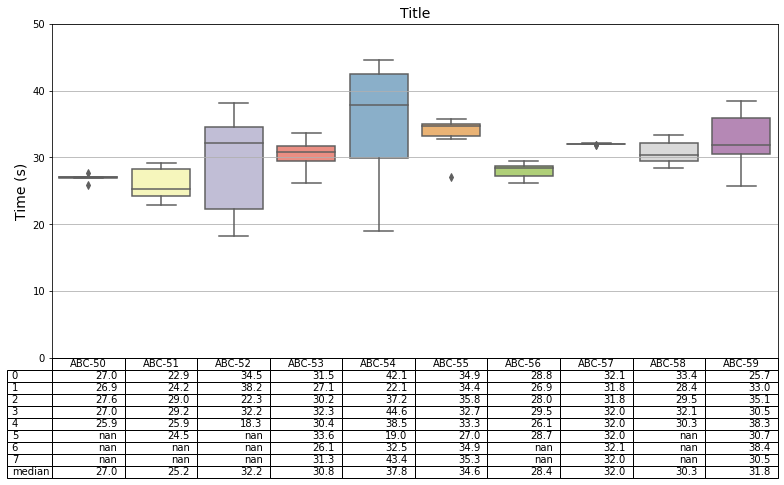

In [9]:
# use seaborn and add table
fig, ax = plt.subplots(figsize=(13, 8))
plt.subplots_adjust(bottom=0.3)
df.plot(table=tbl, ax=ax, alpha=0)
sns.boxplot(data=df, ax=ax, palette='Set3')
ax.set_xticks([])
ax.set_ylim(0, 50)
ax.set_title('Title', size=14)
ax.set_xlabel('')
ax.set_ylabel('Time (s)', size=14)
ax.grid(axis='y')
ax.get_legend().remove()
plt.show()
fig.savefig('boxplot_data01-10.pdf', dpi=100);